In [1]:
import pandas as pd

## bivariate analysis: 

Both columns could be categorical or both numeric.

In [38]:
df=pd.read_csv("D:\studymaterial\DATA SCIENCE\loan_data_set.csv")
df

<>:1: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
<>:1: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
C:\Users\Pcz\AppData\Local\Temp\ipykernel_2916\2928558707.py:1: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
  df=pd.read_csv("D:\studymaterial\DATA SCIENCE\loan_data_set.csv")


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
#how many female got the loan
pd.crosstab(df["Loan_Status"],df["Gender"])

Gender,Female,Male
Loan_Status,,
N,37,150
Y,75,339


In [5]:
#how many of females who got loan or not 
pd.crosstab(df["Loan_Status"],df["Gender"],margins=True)

Gender,Female,Male,All
Loan_Status,,,
N,37,150,187
Y,75,339,414
All,112,489,601


In [6]:
pd.crosstab(df["Loan_Status"],df["Gender"],normalize="index")*100   #in columns overall male /female

Gender,Female,Male
Loan_Status,,
N,19.786096,80.213904
Y,18.115942,81.884058


In [8]:
pd.crosstab(df["Loan_Status"],df["Gender"],normalize="columns") *100  #normalize=%

Gender,Female,Male
Loan_Status,,
N,33.035714,30.674847
Y,66.964286,69.325153


## bivariate numerical analysis

In [19]:
import numpy as np

In [23]:
df.corrwith

<bound method DataFrame.corrwith of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849      

In [17]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
x=df.corr(
    method="pearson",min_periods=1,
    numeric_only=True)
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


It gives corr only for numeric data

In [31]:
#heatmap: complex graph
import seaborn as sns

<Axes: >

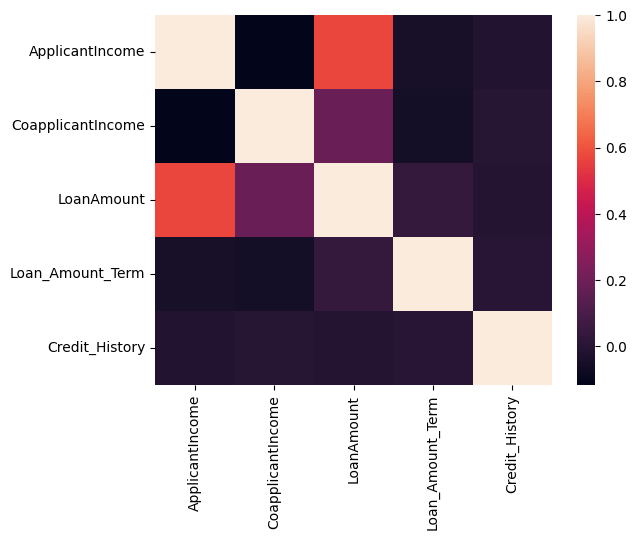

In [32]:
sns.heatmap(x)

sns library for complex grp

<Axes: >

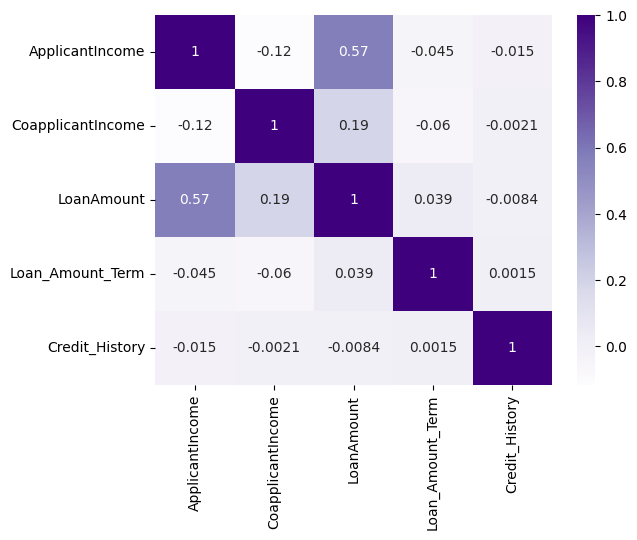

In [37]:
sns.heatmap(x,cmap="Purples",annot=True)    #annot=for corr coefficients

In [39]:
#creating new column
df["New_col"]=df["ApplicantIncome"]*83

In [40]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,New_col
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,485467
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,380389
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,249000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,214389
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,498000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,240700
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,340798
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,669976
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,629389


In [42]:
df.corr(numeric_only=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,New_col
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,1.000000
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.116605
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,0.570909
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.045306
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,-0.014715
New_col,1.000000,-0.116605,0.570909,-0.045306,-0.014715,1.000000


<Axes: >

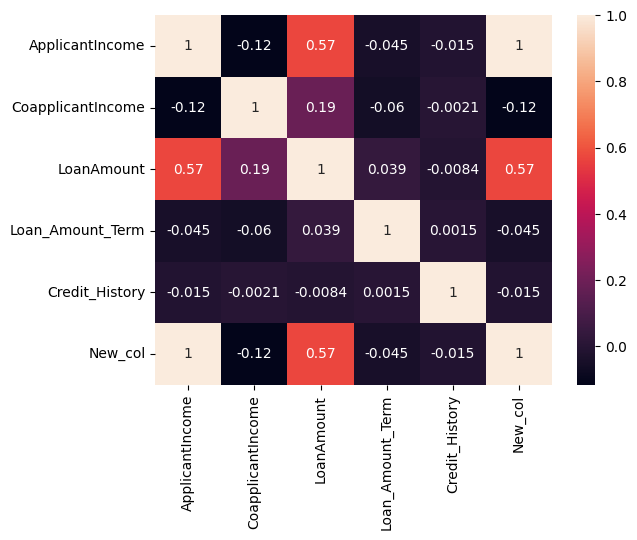

In [44]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

Now here New_col is redundant have outlier column,corr=1, so delete

In [45]:
del df["New_col"]

In [46]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#### bivariate combination of numerical and categorical feature.

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

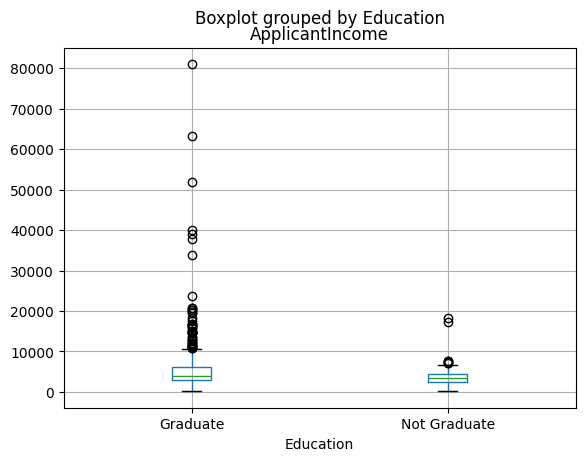

In [47]:
df.boxplot(column="ApplicantIncome", by="Education")

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Self_Employed'>

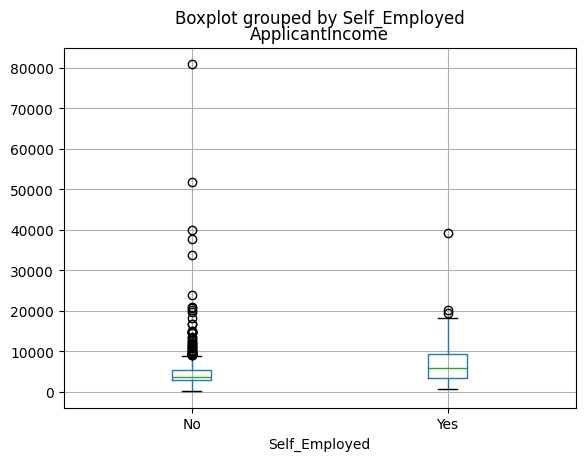

In [48]:
df.boxplot(column="ApplicantIncome", by="Self_Employed")

Here,80k holding person is not self employed so while providing loan it would be considered or not as outlier